In [3]:
IS_LOCAL = True
import numpy as np
import pandas as pd
from skimage.io import imread
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
if(IS_LOCAL):
    import pydicom as dicom
else:
    import dicom
import os

In [4]:
if(IS_LOCAL):
    PATH="./input/siim-medical-image/"
else:
    PATH="./input/"
print(os.listdir(PATH))

['dicom_dir', 'full_archive.npz.zip', 'tiff_images', 'overview.csv', 'tiff_images.zip', 'dicom_dir.zip']


<h1> Read the data</h1>

<h2> Read overview data</h2>

In [5]:
data_df = pd.read_csv(os.path.join(PATH,"overview.csv"))

In [6]:
print("CT Medical images -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

CT Medical images -  rows: 100  columns: 8


In [7]:
data_df.head()

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


<h2> Read TIFF data </h2>

In [8]:
print("Number of TIFF images:", len(os.listdir(os.path.join(PATH,"tiff_images"))))

Number of TIFF images: 100


In [9]:
# tiff_data = pd.DataFrame([{'path': filepath} for filepath in glob(PATH+'tiff_images/*.tif')])

<h3> Process TIFF data </h3>
<p>
We define a function to process data.
<br/>
We extract file, ID, age, contrast, modality information from path info.
</p>

In [10]:
def process_data(path):
    data = pd.DataFrame([{'path': filepath} for filepath in glob(PATH+path)])
    data['file'] = data['path'].map(os.path.basename)
    data['ID'] = data['file'].map(lambda x: str(x.split('_')[1]))
    data['Age'] = data['file'].map(lambda x: int(x.split('_')[3]))
    data['Contrast'] = data['file'].map(lambda x: bool(int(x.split('_')[5])))
    data['Modality'] = data['file'].map(lambda x: str(x.split('_')[6].split('.')[-2]))
    return data

In [11]:
tiff_data = process_data('tiff_images/*.tif')

In [12]:
tiff_data.head()

,path,file,ID,Age,Contrast,Modality
0,./input/siim-medical-image/tiff_images/ID_0085...,ID_0085_AGE_0067_CONTRAST_0_CT.tif,0085,67,False,CT
1,./input/siim-medical-image/tiff_images/ID_0059...,ID_0059_AGE_0074_CONTRAST_0_CT.tif,0059,74,False,CT
2,./input/siim-medical-image/tiff_images/ID_0021...,ID_0021_AGE_0067_CONTRAST_1_CT.tif,0021,67,True,CT
3,./input/siim-medical-image/tiff_images/ID_0056...,ID_0056_AGE_0083_CONTRAST_0_CT.tif,0056,83,False,CT
4,./input/siim-medical-image/tiff_images/ID_0068...,ID_0068_AGE_0072_CONTRAST_0_CT.tif,0068,72,False,CT


<h2> Read DICOM data </h2>

In [15]:
print("Number of DICOM images:", len(os.listdir(os.path.join(PATH,"dicom_dir"))))

Number of DICOM images: 100


<h3> Process DICOM data </h3>

In [17]:
dicom_data = process_data('dicom_dir/*.dcm')

<h3> Check DICOM data </h3>

In [18]:
dicom_data.head()

,path,file,ID,Age,Contrast,Modality
0,./input/siim-medical-image/dicom_dir/ID_0081_A...,ID_0081_AGE_0058_CONTRAST_0_CT.dcm,0081,58,False,CT
1,./input/siim-medical-image/dicom_dir/ID_0047_A...,ID_0047_AGE_0069_CONTRAST_1_CT.dcm,0047,69,True,CT
2,./input/siim-medical-image/dicom_dir/ID_0079_A...,ID_0079_AGE_0071_CONTRAST_0_CT.dcm,0079,71,False,CT
3,./input/siim-medical-image/dicom_dir/ID_0036_A...,ID_0036_AGE_0074_CONTRAST_1_CT.dcm,0036,74,True,CT
4,./input/siim-medical-image/dicom_dir/ID_0011_A...,ID_0011_AGE_0061_CONTRAST_1_CT.dcm,0011,61,True,CT


<h1> Data Exploration </h1>

<h2> Check data consistency </h2>
Let's verify if the content in overview.csv is consistent with the data in tiff_images folder.

In [13]:
def countplot_comparison(feature):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16, 4))
    s1 = sns.countplot(data_df[feature], ax=ax1)
    s1.set_title("Overview data")
    s2 = sns.countplot(tiff_data[feature], ax=ax2)
    s2.set_title("Tiff files data")
    s3 = sns.countplot(dicom_data[feature], ax=ax3)
    s3.set_title("Dicom files data")
    plt.show()

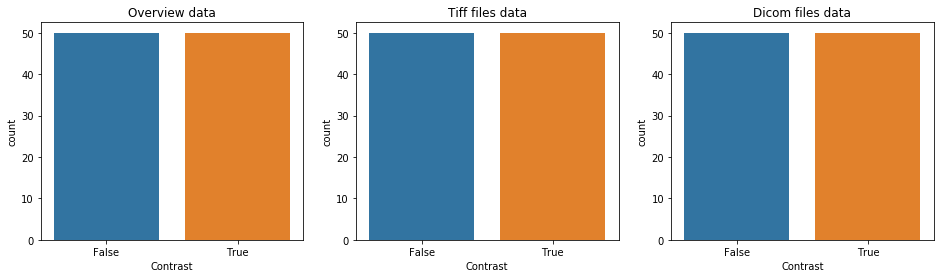

In [19]:
countplot_comparison('Contrast')

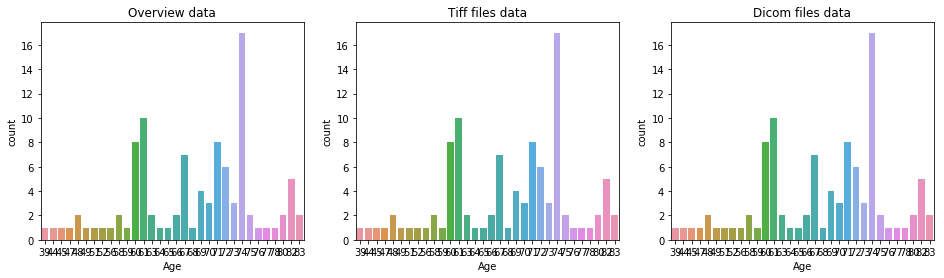

In [20]:
countplot_comparison('Age')

<h3> Show TIFF images </h3>
We will show a subsample of 16 images from the total of 100 images.
We will select the first 16 images from the data set.
We will use grayscale.
We define here a generic function to represent both TIFF images and DICOM images. For each file format we use a different processing.

In [21]:
def show_images(data, dim=16, imtype='TIFF'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):
        if(imtype=='TIFF'): 
            data_row_img = imread(data_row['path'])
        elif(imtype=='DICOM'):
            data_row_img = dicom.read_file(data_row['path'])
        if(imtype=='TIFF'):
            ax[i//4, i%4].matshow(data_row_img,cmap='gray')
        elif(imtype=='DICOM'):
            ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {Modality} Age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**data_row))
    plt.show()

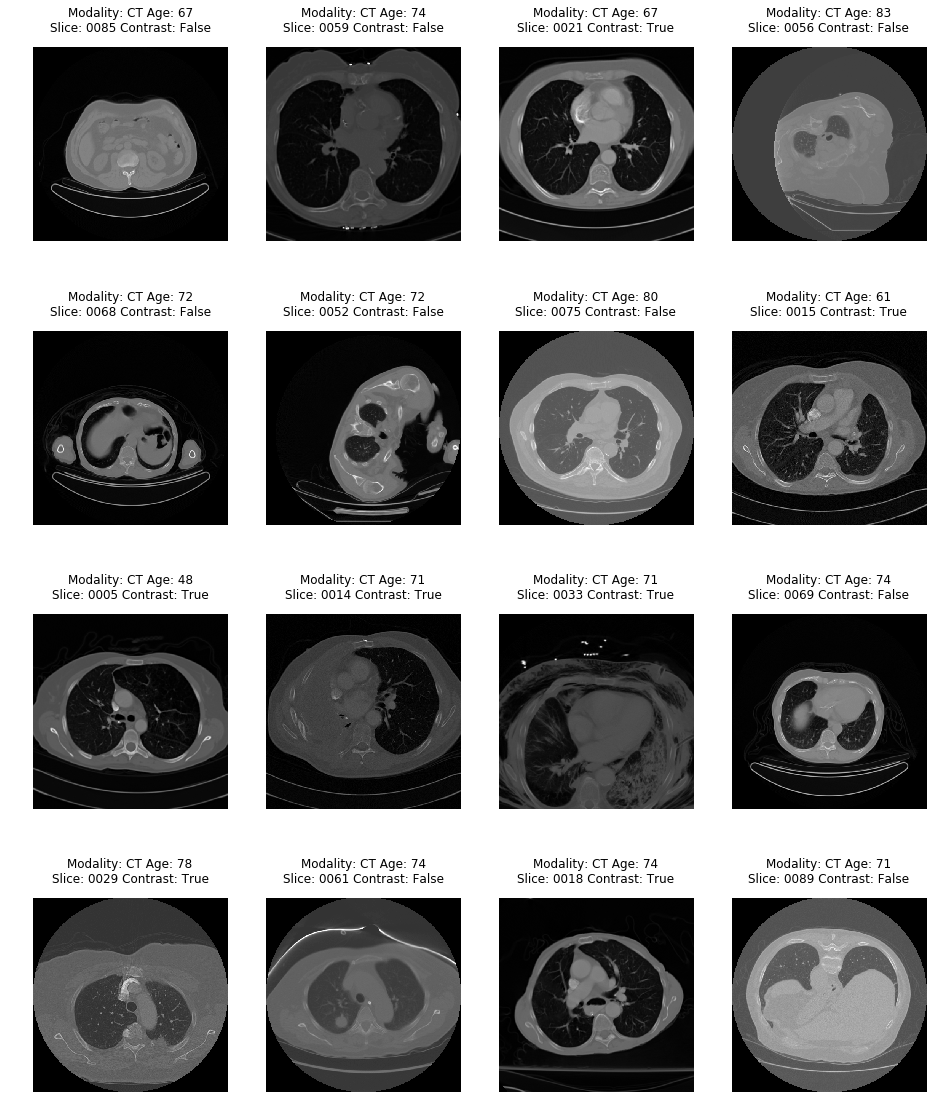

In [22]:
show_images(tiff_data,16,'TIFF')

<h3> Show DICOM data </h3>
We will show a subsample of 16 images from the total of 100 images.
We will use grayscale.
Ideally, if the DICOM images would be a set of slices from a single examen, they could be aggregated using a function like the one shown here: extract_voxel_data - which read the DICOM slices (each in a separate file) and aggregate the image data in a 3D voxel tensor. This will not be the case here, because we are storing slices from different patients and exams (one slice / exam / patient).

The following code snapshot shows how tipically a DICOM 2D image subset is used to create a 3D scene.

In [23]:
# # extract voxel data  
# def extract_voxel_data(list_of_dicom_files):  
#     datasets = [dicom.read_file(f) for f in list_of_dicom_files]  
#      try:  
#          voxel_ndarray, ijk_to_xyz = dicom_numpy.combine_slices(datasets)  
#      except dicom_numpy.DicomImportException as e:  
#      # invalid DICOM data  
#          raise  
#      return voxel_ndarray  

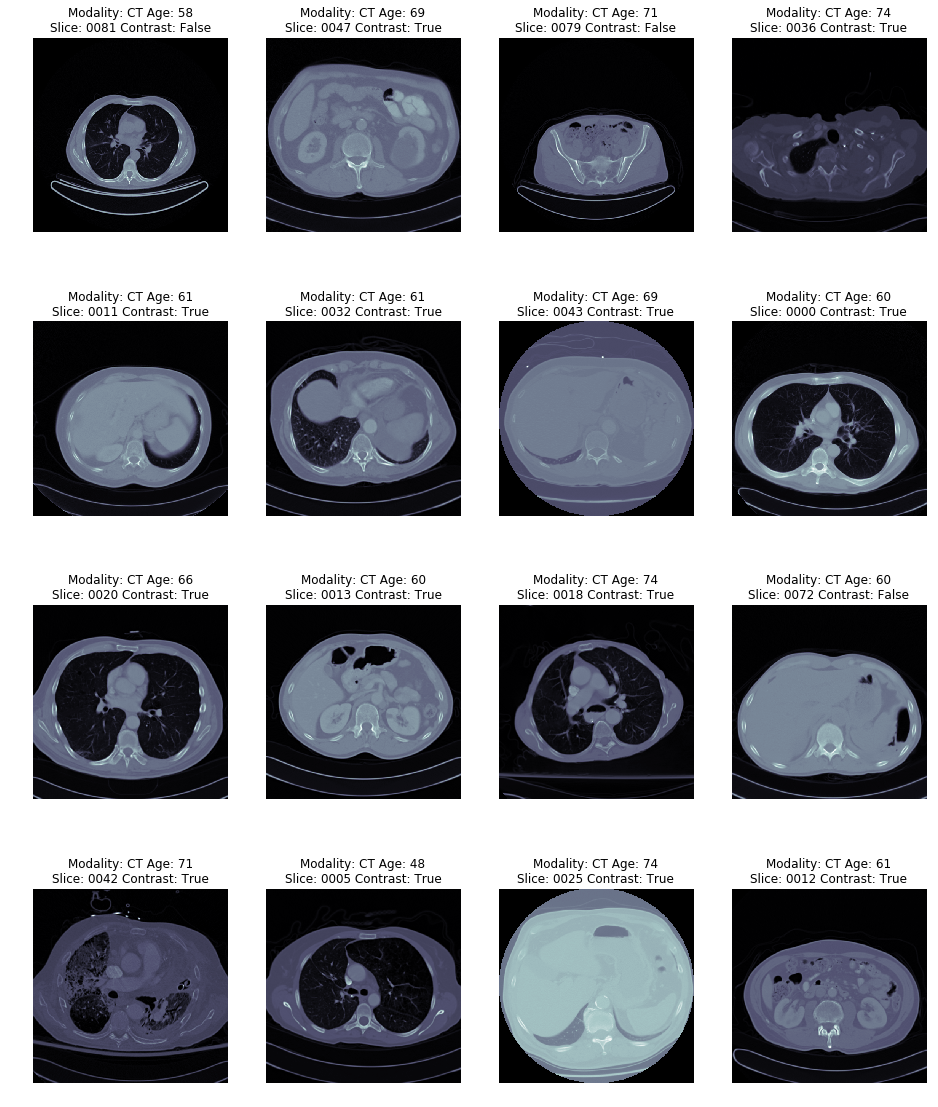

In [24]:
show_images(dicom_data,16,'DICOM')

<h3> More about DICOM data </h3>
A DICOM file containg much more information than the image itself that we represented. Let's glimpse, for one of the DICOM files, this information. We will read the first dicom file only and show this information.
We use <b>dicom</b> package.

In [25]:
dicom_file_path = list(dicom_data[:1].T.to_dict().values())[0]['path']
dicom_file_dataset = dicom.read_file(dicom_file_path)
dicom_file_dataset

(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.4012.279734324664906807712849648196
(0008, 0020) Study Date                          DA: '20051015'
(0008, 0021) Series Date                         DA: '20051015'
(0008, 0022) Acquisition Date                    DA: '20051015'
(0008, 0023) Content Date                        DA: '20051015'
(0008, 0030) Study Time                          TM: '081132.000'
(0008, 0031) Series Time                         TM: '081907.000'
(0008, 0032) Acquisition Time                    TM: '081815.355006'
(0008, 0033) Content Time                        TM: '081815.355006'
(0008, 0040) Data Set Type                       US: 0
(0008, 0041) Data Set Subtype                    LO: 'IMA NONE'
(0008, 0050) Accession Number                    SH: '614412306256

<p>We can extract various fields from the DICOM FileDataset. Here are few examples:</p>
<ul>
<li>Modality  </li>
<li>Manufacturer</li>
<li>Patient Age  </li>
<li>Patient Sex</li>
<li>Patient Name  </li>
<li>Patient ID</li>
</ul>

In [26]:
print("Modality: {}\nManufacturer: {}\nPatient Age: {}\nPatient Sex: {}\nPatient Name: {}\nPatient ID: {}".format(
    dicom_file_dataset.Modality, 
    dicom_file_dataset.Manufacturer,
    dicom_file_dataset.PatientAge,
    dicom_file_dataset.PatientSex,
    dicom_file_dataset.PatientName,
    dicom_file_dataset.PatientID))

Modality: CT
Manufacturer: SIEMENS
Patient Age: 058Y
Patient Sex: M
Patient Name: TCGA-92-8064
Patient ID: TCGA-92-8064


Some of the information are anonymized (like Name and ID), which is common standard for public medical data.

We will modify the visualization function, to show parameters from the DICOM data instead of the parameters extracted from the image name.

In [27]:
def show_dicom_images(data):
    img_data = list(data[:16].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):

        data_row_img = dicom.read_file(data_row['path'])
        modality = data_row_img.Modality
        age = data_row_img.PatientAge
        
        ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {} Age: {}\nSlice: {} Contrast: {}'.format(
         modality, age, data_row['ID'], data_row['Contrast']))
    plt.show()

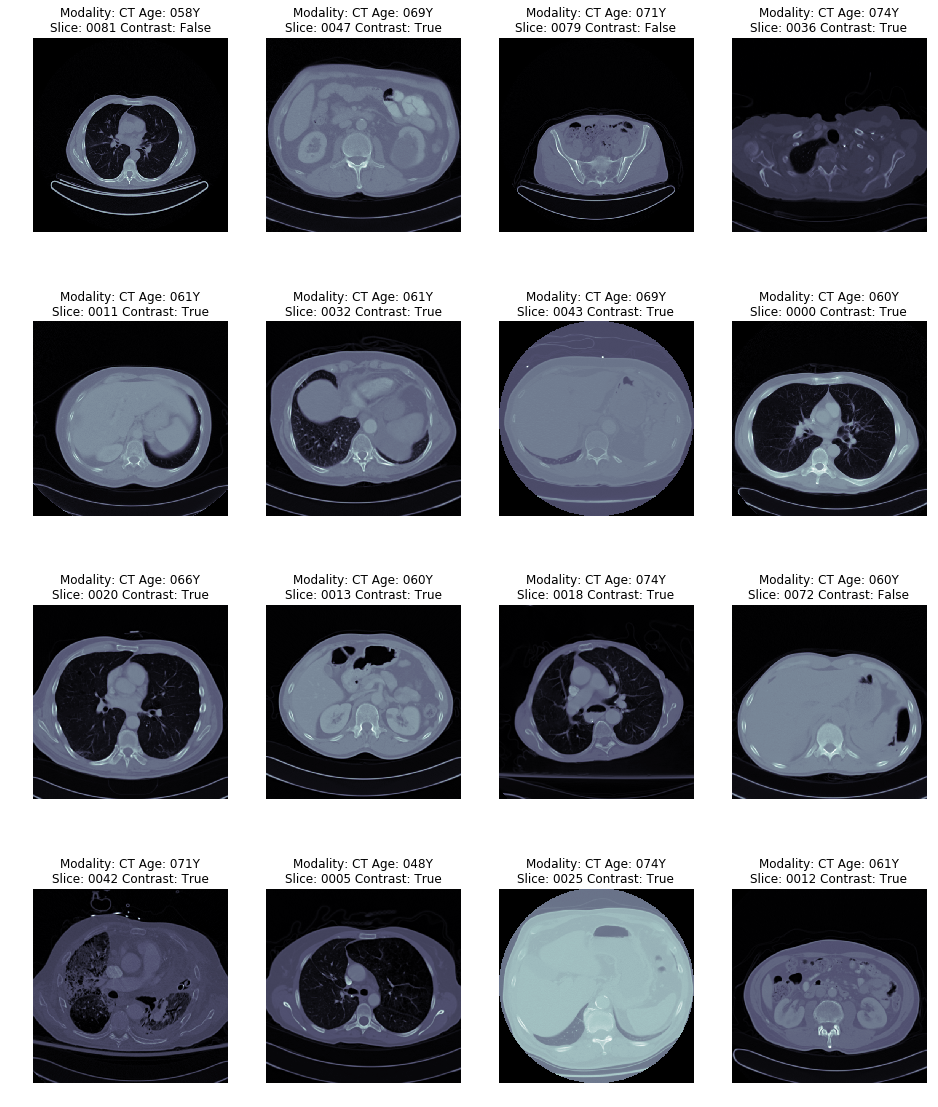

In [28]:
show_dicom_images(dicom_data)